<a href="https://colab.research.google.com/github/ktongk/BTT-JPMC-1/blob/main/scrape_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtaining a list of equities tickers and the corresponding timeseries

In [ ]:
! pip install --quiet yfinance ##--quiet mutes the package list as it’s installing

In [ ]:
import os
import json
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
import matplotlib.pyplot as plt


from datetime import datetime
''
# this workaround let's us override pandas_datareader with yfinance,
# although we can also use yfinance directly
import yfinance as yf
import pandas_datareader.data as web; yf.pdr_override()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
start_date = '2023-03-02'
end_date  = '2023-03-21'

data_dir = '/data/'

#A Timeline on the SVB Crash and why we Chose it

According to Investopedia, SVB Financial Group was removed from the S&P 500 Index due to the collapse its bank. So the most recent rebalancing of S&P 500 was announced on March 10, 2023.

The bank, mostly focused on venture capital funds and small tech startups had a huge boom during the pandemic. The bank then invested all of its profits into low-return bonds. However, after aggresive federal rate hikes the bonds quickly lost their value, causing panic. SVB no longer had the cash to give to the companies withdrawing their money and the FDIC took over the bank.







Initally the FDIC could only insure up to 250k but that wasn't enough, causing fear of a 2008 recession. The fed, treasury, and FDIC then announced a new emergency lending program so every company could get their money back.

##Timeseries Length
originally we were going to do the entire month of march but because there was a distinct end it didn't seem necesarry to do the full month. We decided to do a week before SVB announced their losses and then around a week after the emergency lending program was announced

##What other events did we consider?



We wanted to pick an event that had both positive and negative affects on the S&P500 companies and had a distinct beginning and end.

We considered doing the pandemic but it was too long and the rise of chatgpt but there were too many factors to consider (3.5 release, 4.0 release, 3.5 gets worse)
https://arxiv.org/pdf/2307.09009.pdf

In [ ]:
names = ['','SVB announces 1.8 billion loss on bonds', 'SVB shares fall 60%, depositors withdraw money',
         'FDIC takes over SVB only insures up to 250k', 'Fed, Tresury, & FDIC say theyll cover all deposits',
         'Bank stocks bounced back in early trading','',
        ]

dates = ['2023-03-07','2023-03-08', '2023-03-09', '2023-03-10',
             '2023-03-12', '2023-03-14','2023-03-15'
        ]

    # Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

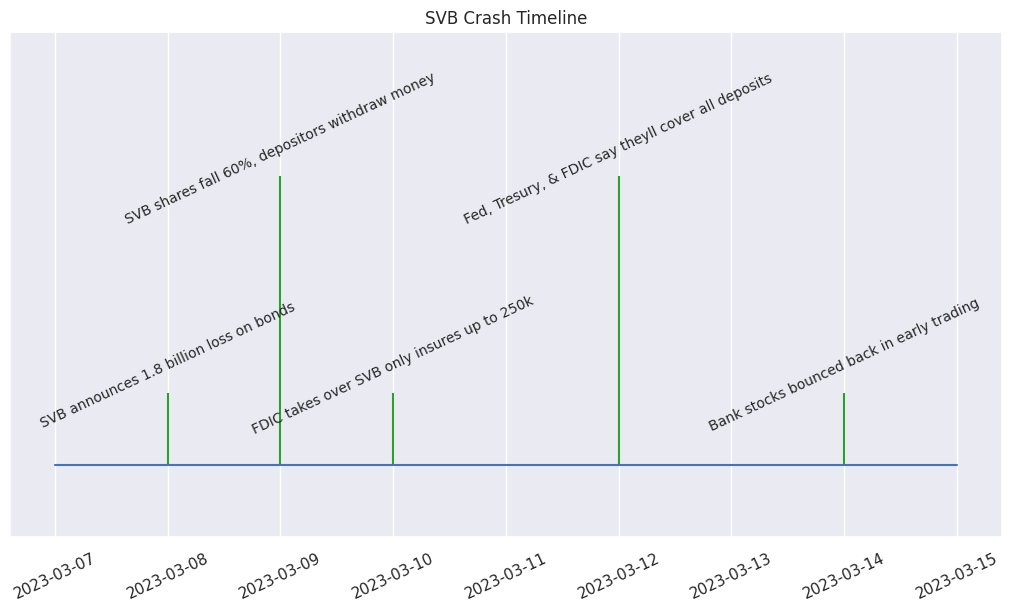

In [ ]:
levels = np.tile([0, 1,4, 1, 4,1, 0], int(np.ceil(len(dates)/5)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(10, 6), layout="constrained")
ax.set(title="SVB Crash Timeline")

ax.vlines(dates, 0, levels, color="tab:green")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates))  # Baseline and markers on it.



for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l), xytext=(0, 1* 20),# 0 means no horizontal offset and 1*20 means annotation will be 20 spaces from the end of the stem
                textcoords="offset points", horizontalalignment="center",
                verticalalignment="center", rotation=25, fontsize = 10)  # Rotate the text by 45 degrees

ax.set_ylim(-1, 6)
ax.yaxis.set_visible(False)
plt.xticks(rotation=25)
plt.show()

## Get list of companies in S&P500

We will obtain and store the list of the constituents from Wikipedia.

In [ ]:
data    = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S%26P_500_component_stocks')
table   = data[0]
#print (table)
symbols = list(table.Symbol.values) ##companies

print("{} symbols in total".format(len(symbols)))


503 symbols in total


## Download price timeseries

Now that we have a list of ticker symbols, we can download the corresponding timeseries from Yahoo Finance.

In [ ]:
symbols.append('SPY')

In [ ]:
dates = '_{}--{}'.format(start_date, end_date)
dates

'_2023-03-02--2023-03-21'

In [ ]:
'''
try:
  os.mkdir(data_dir)
except:
  print("Dir Error")
  '''

os.makedirs(data_dir, exist_ok=True)

In [ ]:
#!ls /data


##Trying to get other types of timeseries data from yfinance
i want to get daily market cap i think

In [ ]:
ticker = yf.Ticker("AAPL")
history = ticker.history(period="30d")
market_cap = history["Close"] * ticker.info["marketCap"]
market_cap.head()

Date
2023-08-11 00:00:00-04:00    4.903083e+14
2023-08-14 00:00:00-04:00    4.949139e+14
2023-08-15 00:00:00-04:00    4.893707e+14
2023-08-16 00:00:00-04:00    4.869438e+14
2023-08-17 00:00:00-04:00    4.798563e+14
Name: Close, dtype: float64

below w

In [ ]:
symbols = sorted(symbols)
print("Downloading {} files".format(len(symbols)))
for i, symbol in enumerate(symbols):
    try:
        df = web.get_data_yahoo(symbol, start_date, end_date,)
        # df = web.DataReader(symbol,'yahoo', start_date, end_date)
        df = df[['Adj Close','Volume']]
        df.to_csv(os.path.join(data_dir, "{}.csv".format(symbol)))
    except KeyError:
      print("Error for {}".format(symbol))
      pass
print("Stored {} files".format(i+1))



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-03-02 -> 2023-03-21)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['KVUE']: Exception("%ticker%: Data doesn't exist for startDate = 1677733200, endDate = 1679371200")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

In [ ]:
# Printing a sample dataframe
idx = np.random.randint(len(symbols))
print("History for {}".format(symbols[idx]))
df = pd.read_csv(os.path.join(data_dir, symbols[idx]+".csv")).set_index('Date')
df.head()

History for AAL


Adj Close    Volume
Date                           
2023-03-02  16.120001  11728300
2023-03-03  16.360001  14389500
2023-03-06  16.120001  13504800
2023-03-07  16.360001  17951300
2023-03-08  16.590000  11399600

## Pre-process Financial Timeseries

In [ ]:
index = pd.date_range(start=start_date, end=end_date, freq='D')     # initialize an empty DateTime Index and so each index is a date over the month
df_price = pd.DataFrame(index=index, columns=symbols)               # initialize empty dataframes
df_volume = pd.DataFrame(index=index, columns=symbols)

In [ ]:
# Aggregate all symbols into a price dataframe and volume dataframe
#for each ticker symbol get that csv file, set the index of that to the datetimes
#for each column in df_price is that company's adj price every datetime
for symbol in symbols:
    symbol_df = pd.read_csv(os.path.join(data_dir, symbol+".csv")).set_index('Date')
    symbol_df.index = pd.to_datetime(symbol_df.index)

    df_price[symbol] = symbol_df['Adj Close']
    df_volume[symbol] = symbol_df['Volume']

### Removing NaNs

In [ ]:
# Let's drop the dates where all the stocks are NaNs, ie., weekends/holidays where no trading occured
df_price.dropna(how='all', inplace=True)
df_volume.dropna(how='all', inplace=True)
df_price.dropna(inplace=True, axis=1)
df_volume.dropna(inplace=True, axis=1)
assert((df_price.index == df_volume.index).all())

In [ ]:
True in pd.isna(df_price)

False

### Storing the cleaned dataframes

In [ ]:
#so instead of 500 csv files its now two
df_price.to_csv(os.path.join(data_dir, "prices.csv"), index_label='date')
df_volume.to_csv(os.path.join(data_dir, "volume.csv"))

#finds percent change between current price and prior
df_price_pct = df_price.pct_change()[1:]
df_price_pct.to_csv(os.path.join(data_dir, "prices_pct.csv"), index_label='date')
df_price_pct.head()

A       AAL      AAPL      ABBV      ABNB       ABT  \
2023-03-03  0.015953  0.014888  0.035090  0.010882  0.027374  0.017734   
2023-03-06 -0.004864 -0.014670  0.018539 -0.004998  0.004772 -0.016276   
2023-03-07 -0.020247  0.014888 -0.014496 -0.015134  0.004829 -0.026959   
2023-03-08  0.004062  0.014059  0.008377 -0.021775 -0.015283 -0.005801   
2023-03-09 -0.013982 -0.042797 -0.014915 -0.015040 -0.041280 -0.015594   

                ACGL       ACN      ADBE       ADI  ...      WYNN       XEL  \
2023-03-03  0.005642  0.014853  0.031604  0.008993  ...  0.021338  0.011812   
2023-03-06  0.005610  0.001597  0.008662 -0.003919  ... -0.003712 -0.000768   
2023-03-07 -0.009902 -0.020139 -0.006397 -0.003126  ... -0.019411 -0.022137   
2023-03-08 -0.009861 -0.002044  0.003016  0.008814  ...  0.003358  0.012419   
2023-03-09 -0.027173 -0.014792 -0.021600 -0.016133  ... -0.034437 -0.002329   

                 XOM      XRAY       XYL       YUM       ZBH      ZBRA  \
2023-03-03  0.012657  0.028132  0.016333  0.007693  0.026262  0.011076   
2023-03-06  0.008864  0.013681 -0.003368 -0.002853 -0.012676 -0.011763   
2023-03-07 -0.019330 -0.017316 -0.013517 -0.018407 -0.011796 -0.011935   
2023-03-08 -0.014604 -0.016585 -0.003915 -0.001103 -0.010069  0.016250   
2023-03-09 -0.007729 -0.022661 -0.012675 -0.005758  0.003609 -0.033087   

                ZION       ZTS  
2023-03-03  0.019044  0.011745  
2023-03-06 -0.009547 -0.005218  
2023-03-07 -0.047580 -0.015560  
2023-03-08  0.005168  0.009639  
2023-03-09 -0.113967 -0.006819  

[5 rows x 501 columns]

In [ ]:
df_price.pct_change()[1:].to_csv(os.path.join(data_dir, 'prices_pct'+dates+'.csv'), index_label='date')
df_price.to_csv(os.path.join(data_dir, 'prices'+dates+'.csv'), index_label='date')

## Obtain Percentage Change and Correlation

We need to convert prices to percent change in price as opposed to the actual \$ price. This is because stocks with very similar prices can behave very differently and vice-versa.
For e.g., if a stock moves from \$100 to \$110, we want the price column to say 10% (indicating the change).

However, for volume, we will retain magnitude.

Spearman correlation

In [ ]:
df_price_pct = df_price.pct_change().dropna(how='all')
df_volume_pct = df_volume.pct_change().dropna(how='all')

### Calculate Correlations

In [ ]:
price_corr = df_price_pct.corr()
volume_corr = df_volume.corr()

In [ ]:
price_corr.head()

A       AAL      AAPL      ABBV      ABNB       ABT      ACGL  \
A     1.000000  0.518885  0.791644  0.374018  0.633631  0.810016  0.844037   
AAL   0.518885  1.000000  0.363977 -0.151065  0.736561  0.168846  0.642950   
AAPL  0.791644  0.363977  1.000000  0.431610  0.610112  0.781189  0.553825   
ABBV  0.374018 -0.151065  0.431610  1.000000  0.339878  0.705050  0.322698   
ABNB  0.633631  0.736561  0.610112  0.339878  1.000000  0.482641  0.751249   

           ACN      ADBE       ADI  ...      WYNN       XEL       XOM  \
A     0.907142  0.633080  0.872986  ...  0.769743  0.302472  0.665965   
AAL   0.615691  0.609986  0.667912  ...  0.739896 -0.394522  0.452226   
AAPL  0.815992  0.691610  0.642086  ...  0.712922  0.532877  0.515754   
ABBV  0.290110  0.224160  0.327988  ...  0.359325  0.294439  0.311519   
ABNB  0.783878  0.845854  0.700263  ...  0.805316 -0.174715  0.398856   

          XRAY       XYL       YUM       ZBH      ZBRA      ZION       ZTS  
A     0.743983  0.842872  0.723940  0.581282  0.822347  0.232825  0.829997  
AAL   0.273453  0.530965  0.064477  0.102182  0.648352  0.545734  0.338240  
AAPL  0.803460  0.644941  0.761709  0.446679  0.716757  0.305478  0.782669  
ABBV  0.674334  0.404991  0.548517  0.709124  0.218784  0.018602  0.133279  
ABNB  0.569477  0.545921  0.349105  0.265398  0.693478  0.571563  0.435600  

[5 rows x 501 columns]

Text(0.5, 1.0, 'Correlation heatmap for Volume')

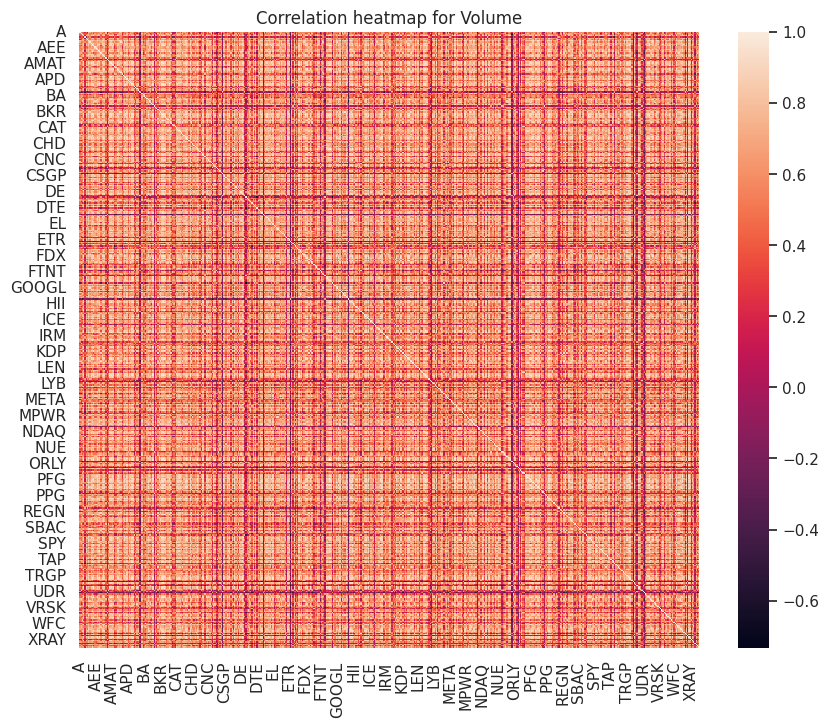

In [ ]:
sns.heatmap(volume_corr).set_title("Correlation heatmap for Volume")

Text(0.5, 1.0, 'Correlation heatmap for Price Changes')

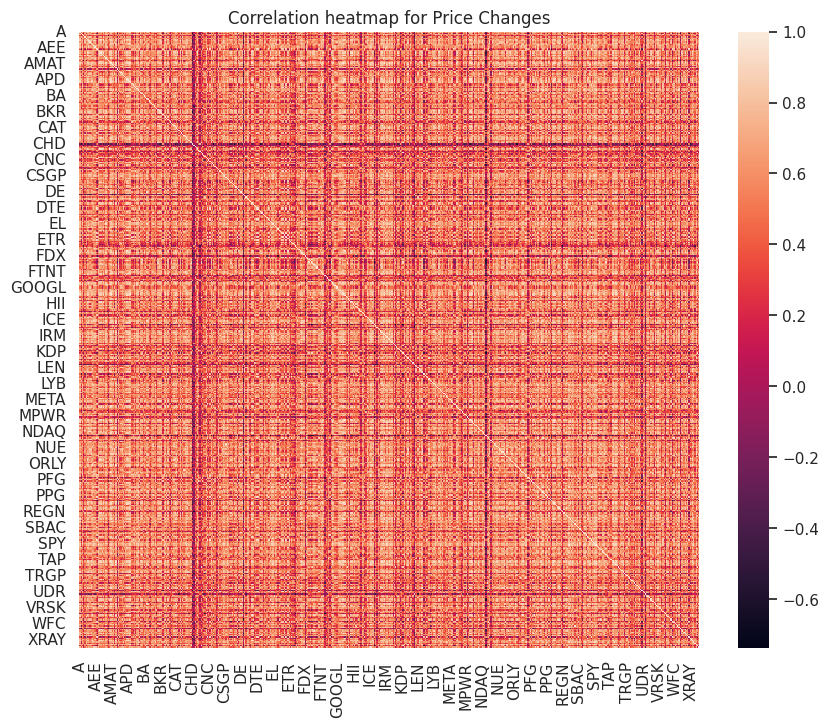

In [ ]:
sns.heatmap(price_corr).set_title("Correlation heatmap for Price Changes")

### Examining correlations further

In [ ]:
df_price_pct['JPM'].head()

2023-03-03    0.018360
2023-03-06   -0.005847
2023-03-07   -0.029408
2023-03-08   -0.005915
2023-03-09   -0.054136
Name: JPM, dtype: float64

Text(0.5, 1.0, 'Price Change Scatterplot between JPM and GS. Correlation = 0.5898308536523322')

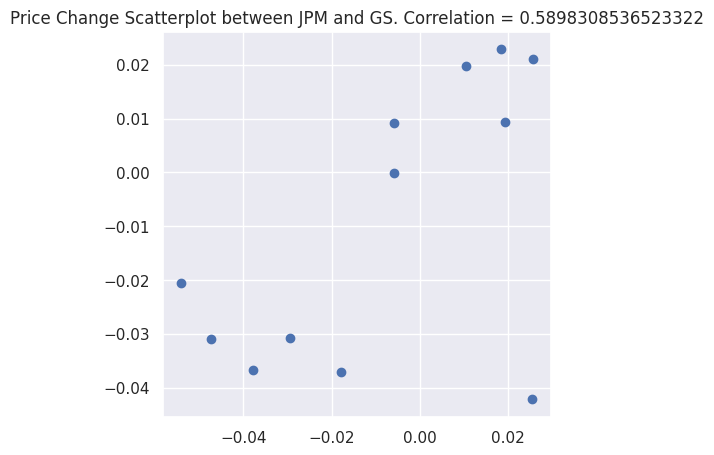

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(df_price_pct['JPM'], df_price_pct['GS'])
plt.title('Price Change Scatterplot between JPM and GS. Correlation = {}'.format(price_corr['JPM']['GS']))

Summary statistics for the df_price_pct and df_volume dataframes and then boxplots to find outliers

In [ ]:
df_price_pct.head()

A       AAL      AAPL      ABBV      ABNB       ABT  \
2023-03-03  0.015953  0.014888  0.035090  0.010882  0.027374  0.017734   
2023-03-06 -0.004864 -0.014670  0.018539 -0.004998  0.004772 -0.016276   
2023-03-07 -0.020247  0.014888 -0.014496 -0.015134  0.004829 -0.026959   
2023-03-08  0.004062  0.014059  0.008377 -0.021775 -0.015283 -0.005801   
2023-03-09 -0.013982 -0.042797 -0.014915 -0.015040 -0.041280 -0.015594   

                ACGL       ACN      ADBE       ADI  ...      WYNN       XEL  \
2023-03-03  0.005642  0.014853  0.031604  0.008993  ...  0.021338  0.011812   
2023-03-06  0.005610  0.001597  0.008662 -0.003919  ... -0.003712 -0.000768   
2023-03-07 -0.009902 -0.020139 -0.006397 -0.003126  ... -0.019411 -0.022137   
2023-03-08 -0.009861 -0.002044  0.003016  0.008814  ...  0.003358  0.012419   
2023-03-09 -0.027173 -0.014792 -0.021600 -0.016133  ... -0.034437 -0.002329   

                 XOM      XRAY       XYL       YUM       ZBH      ZBRA  \
2023-03-03  0.012657  0.028132  0.016333  0.007693  0.026262  0.011076   
2023-03-06  0.008864  0.013681 -0.003368 -0.002853 -0.012676 -0.011763   
2023-03-07 -0.019330 -0.017316 -0.013517 -0.018407 -0.011796 -0.011935   
2023-03-08 -0.014604 -0.016585 -0.003915 -0.001103 -0.010069  0.016250   
2023-03-09 -0.007729 -0.022661 -0.012675 -0.005758  0.003609 -0.033087   

                ZION       ZTS  
2023-03-03  0.019044  0.011745  
2023-03-06 -0.009547 -0.005218  
2023-03-07 -0.047580 -0.015560  
2023-03-08  0.005168  0.009639  
2023-03-09 -0.113967 -0.006819  

[5 rows x 501 columns]

# Summary Stats and Outliers?
The below box plot is showing the price percentage change averaged across all 500 companies for each day, there's no outliers so it doesn't seem like theres one day in the timeseries where all the companies are all having drastic movement.




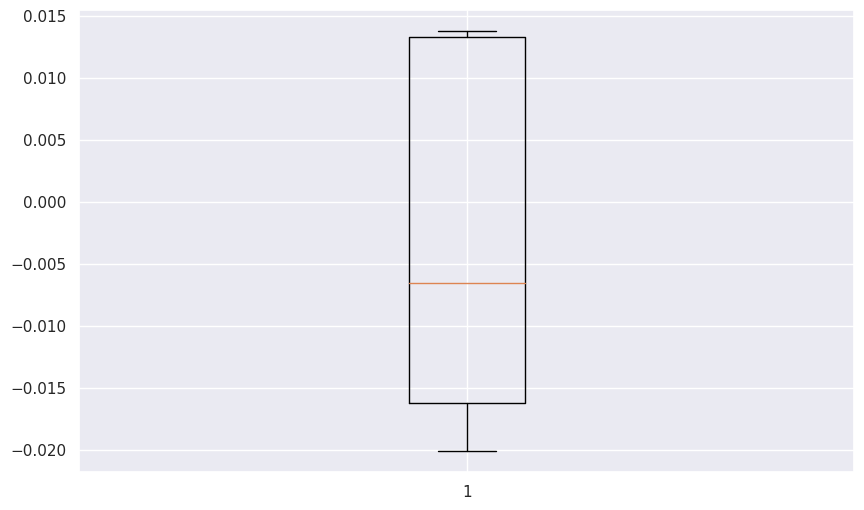

count    12.000000
mean     -0.003688
std       0.014265
min      -0.020073
25%      -0.016181
50%      -0.006530
75%       0.013305
max       0.013800
Name: average, dtype: float64

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
df_price_plotting = df_price_pct
df_price_plotting['average'] = df_price_plotting.mean(axis=1)
#average across all companies per day



# Creating plot
plt.boxplot(df_price_plotting['average'])

# show plot
plt.show()
df_price_plotting['average'].describe()

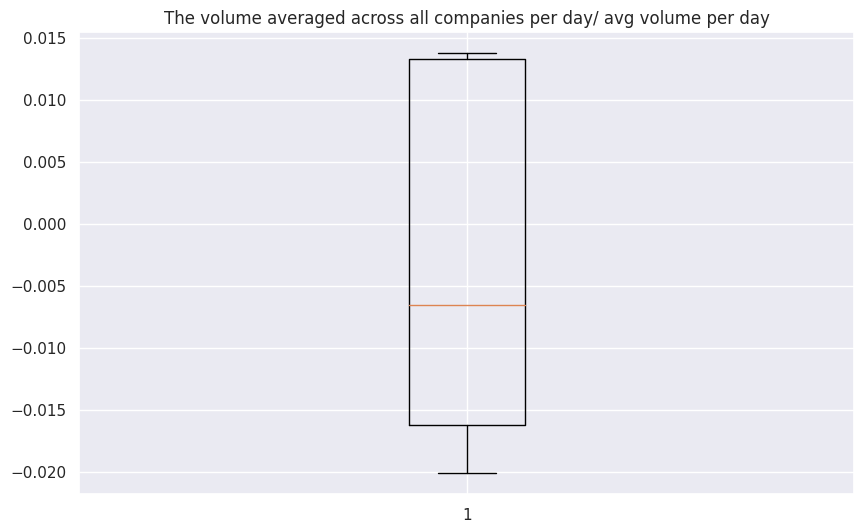

count    12.000000
mean     -0.003688
std       0.014265
min      -0.020073
25%      -0.016181
50%      -0.006530
75%       0.013305
max       0.013800
Name: average, dtype: float64

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set(title="The volume averaged across all companies per day/ avg volume per day")
df_volume_summary_stats = df_volume.describe()
df_volume_summary_stats['average'] = df_volume_summary_stats.mean(axis=1)
df_volume_summary_stats['average']


# Creating plot
plt.boxplot(df_price_plotting['average'])

# show plot
plt.show()
df_price_plotting['average'].describe()

### Analyzng the distributions over time

This time instead of averaging every companies price change per day we're going to look at every company's price change over one day and make a separate boxplot to show the changes in distribution across the week of the crash

on march 2nd there was  3  negative outliers and  13 positive outliers in the distribution
on march 9th there was  21  negative outliers and  3 positive outliers in the distribution
on march 15th there was  10  negative outliers and  14 positive outliers in the distribution
on march 19th there was  10  negative outliers and  10 positive outliers in the distribution




[Text(0.5, 1.0, 'Price % changes on march 19th 2023')]

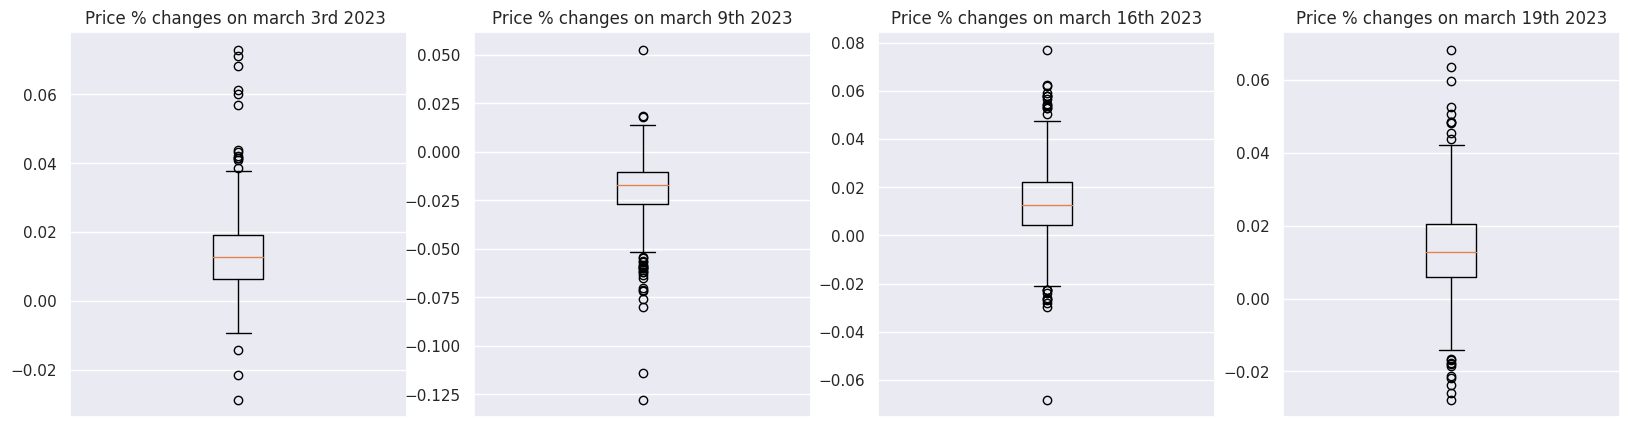

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(20, 5), ncols=4)
bxplt1 = ax1.boxplot(df_price_pct.loc['2023-03-03'])
bxplt2 = ax2.boxplot(df_price_pct.loc['2023-03-09'])
bxplt3 = ax3.boxplot(df_price_pct.loc['2023-03-16'])
bxplt4 = ax4.boxplot(df_price_pct.loc['2023-03-20'])
ax1.xaxis.set_visible(False)
ax2.xaxis.set_visible(False)
ax3.xaxis.set_visible(False)
ax4.xaxis.set_visible(False)

outliers1 = bxplt1["fliers"][0].get_ydata()
outliers2 = bxplt2["fliers"][0].get_ydata()
outliers3 = bxplt3['fliers'][0].get_ydata()
outliers4 = bxplt4['fliers'][0].get_ydata()

neg_outliers1 = outliers1[outliers1<0]
neg_outliers2 = outliers2[outliers2<0]


print('on march 2nd there was ', len(neg_outliers1), ' negative outliers and ', len(outliers1[outliers1>0]), 'positive outliers in the distribution')
print('on march 9th there was ', len(neg_outliers2), ' negative outliers and ', len(outliers2[outliers2>0]), 'positive outliers in the distribution')
print('on march 15th there was ', len(outliers3[outliers3<0]), ' negative outliers and ', len(outliers3[outliers3>0]), 'positive outliers in the distribution')
print('on march 19th there was ', len(outliers4[outliers4<0]), ' negative outliers and ', len(outliers4[outliers4<0]), 'positive outliers in the distribution\n\n')

ax1.set(title="Price % changes on march 3rd 2023 ")
ax2.set(title="Price % changes on march 9th 2023")
ax3.set(title= "Price % changes on march 16th 2023")
ax4.set(title = "Price % changes on march 19th 2023")


This is also shown in the line graph showing how during the week of the crash, healthcare company ABT stayed consistent with the monthly trends while financial company charles schwab had one of its lowest price drops. Tesla, a silicon tech company had big drop on the 9th but rebounded pretty quickly

I wanted to show how the crash affects other sectors besides financial

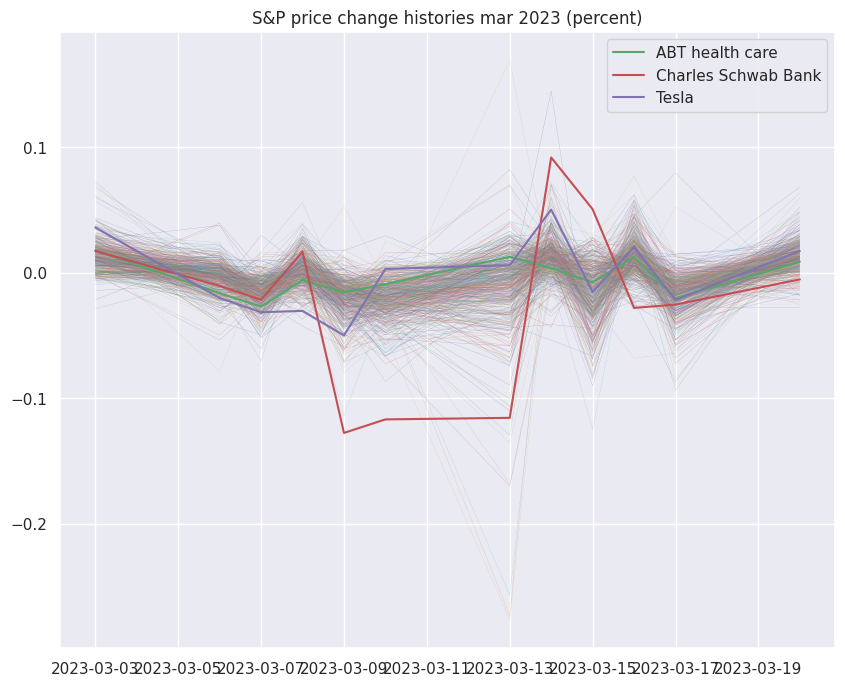

In [ ]:
plt.title('S&P price change histories mar 2023 (percent)')
plt.plot(df_price_pct, linewidth=0.10)
plt.plot(df_price_pct['ABT'], label='ABT health care', linewidth=1.5)
plt.plot(df_price_pct['SCHW'], label = 'Charles Schwab Bank', linewidth=1.5)
plt.plot(df_price_pct['TSLA'], label = 'Tesla', linewidth=1.5)
plt.legend()

## Not every company reacted the same way
In the original time series used for the file, JPMC and GS's price changes were consistent with each other throughout the month. However, when we set the timeseries to march 2023, during the week of the SVB crash they diverge drastically, this is because while GS suffered due to uncertaintiy w/ the economy, JPMC was in talks to accquire SVB thus their price sky rocketed so you can't definetively say every financial company suffered due to the crash.

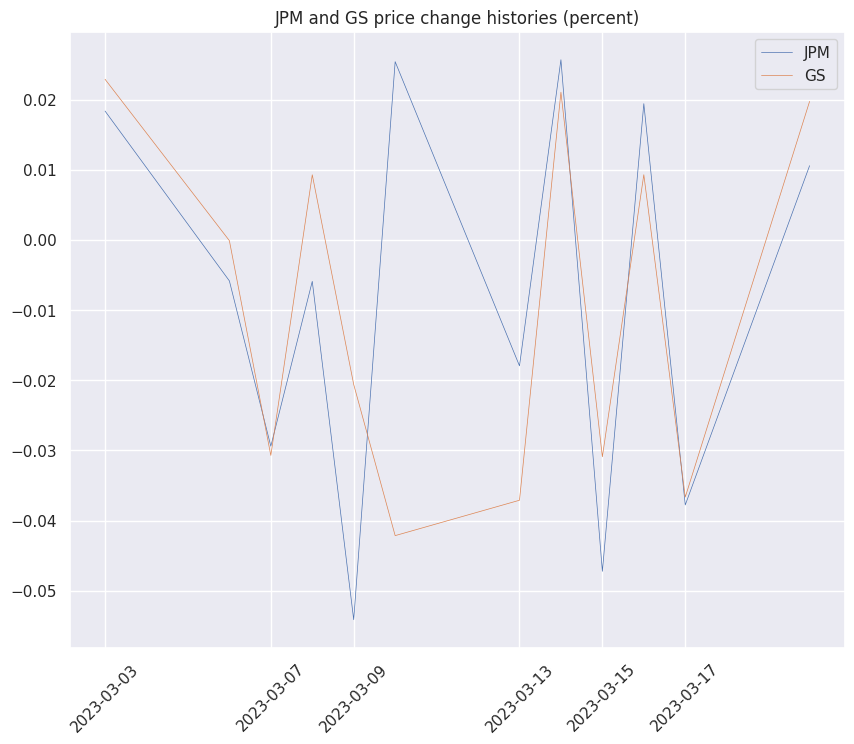

In [ ]:
plt.title('JPM and GS price change histories (percent)')
plt.plot(df_price_pct['JPM'], label='JPM', linewidth=0.5)
plt.plot(df_price_pct['GS'], label='GS', linewidth=0.5)
dates = list(df_price_pct.index.values)
plt.xticks([dates[i] for i in range(len(dates)) if i % 2 == 0], rotation=45)
plt.legend()

In [ ]:
df_price_pct_summary_stats = df_price_pct.describe()
df_price_pct_summary_stats['average'] = df_price_pct_summary_stats.mean(axis=1)
print('summary statistics for price (not pct change) averaged across all companies')
#df_price_pct_summary_stats.head()
print(df_price_pct_summary_stats['average'])

summary statistics for price (not pct change) averaged across all companies
count    12.000000
mean     -0.003688
std       0.020224
min      -0.037230
25%      -0.017054
50%      -0.003837
75%       0.009749
max       0.029097
Name: average, dtype: float64


## Saving correlation dataframes

In [ ]:
#df_price_pct.to_csv(os.path.join(data_dir, 'price_pct.csv'), index_label='date')
price_corr.to_csv(os.path.join(data_dir, 'price_corr.csv'), index_label='Symbol')
volume_corr.to_csv(os.path.join(data_dir, 'volume_corr.csv'))

#From Correlation Matrix to Graph (Network)
We're going to be using package networkX to convert the correlation matrix to a graph structure
This first graph is static and is quite hard to read

In [ ]:
import networkx as nx
import plotly.graph_objects as go

In [ ]:
threshold = .7

links = price_corr.stack().reset_index()
links.columns = ['company1', 'company2', 'correlation']
#made price_corr go from company names as the row and column indeces to company1 being the first column header, company2 beign the second, and correlation as the third

#filtering out any correlations under the threshold that we will set and getting rid of the self loops in the nodes
links_filtered=links.loc[ (links['correlation'] > threshold) & (links['company1'] != links['company2']) ]
G=nx.from_pandas_edgelist(links_filtered, 'company1', 'company2')
nodes = list(G.nodes)
df_company_names = pd.DataFrame(nodes, columns=['S&P Names'])



G is the graph but now I'm playing with different ways to visualize it, the original briefing video mentioned making an interactive graph so i'm going to try that. below is the standard static graph. should also note that everytime that you run the cell the shape is slightly different, you can still tell which nodes are central and which are outliers relative to each other though.

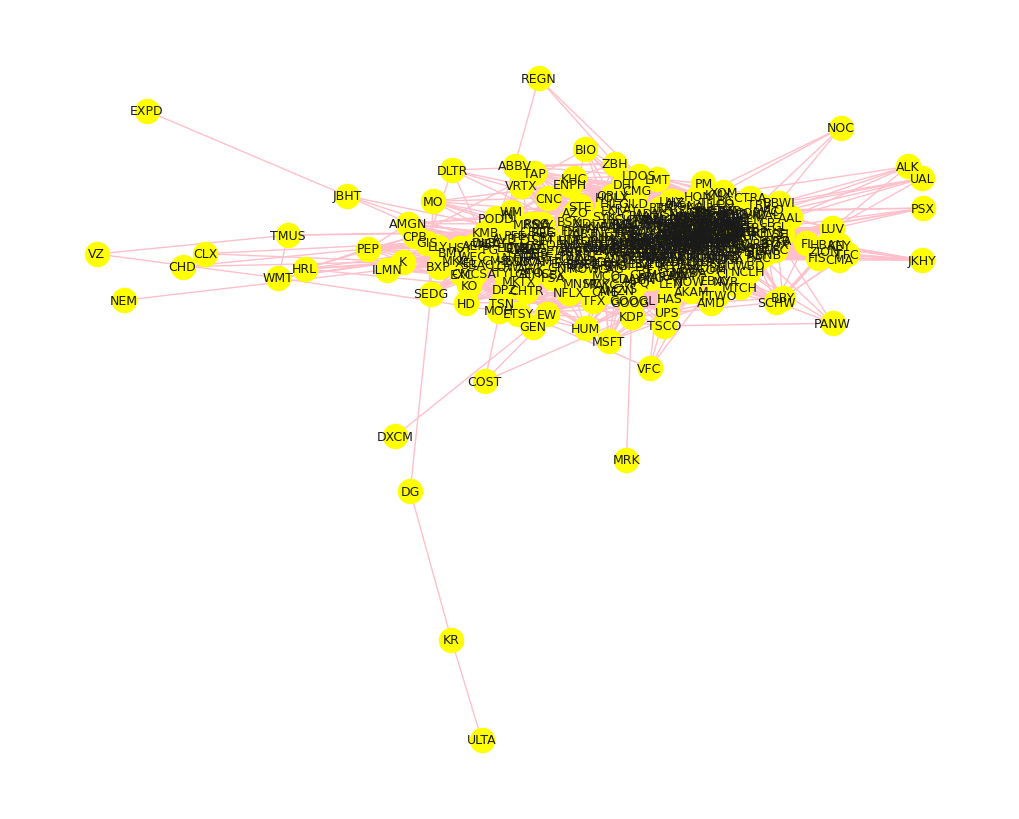

In [ ]:
nx.draw(G, with_labels=True, node_color='yellow', node_size=300, edge_color='pink', linewidths=1, font_size=9)

##Attempting to make an interactive graph
Most of the nodes are clustered around a central area, so thats why its important to make the graph interactive


<a href="https://python-graph-gallery.com/327-network-from-correlation-matrix/#:~:text=We%20have%20to%20transpose%20first%2C%20because%20the%20corr,network%3A%20nx.draw%28G%2C%20with_labels%3DTrue%2C%20node_color%3D%27orange%27%2C%20node_size%3D400%2C%20edge_color%3D%27black%27%2C%20linewidths%3D1%2C%20font_size%3D15%29"> static graph source</a>

<a href="https://plotly.com/python/network-graphs/">Interactive graph source plotly</a>

so for plotly to work there needs to be a location for each node and each edge, these can be defined as 'node attributes'

In [ ]:
pos = nx.spring_layout(G)
nx.set_node_attributes(G, pos, 'pos')

In [ ]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(nodes[node]+' # of connections: '+str(len(adjacencies[1])))



In [ ]:
node_x = []
node_y = []
edge_x = []
edge_y = []



for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    hoverinfo='text',
    text=list(G.nodes()),
    hovertext = node_text,
    textposition='top right',
    #textfont=dict(color='#E58606'),
    mode='lines+markers+text', #+text
    marker=dict(
        showscale=True,
        colorscale='Rainbow',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ), line_width =2 ))


In [ ]:

node_trace.marker.color = node_adjacencies

In [ ]:
price_corr['SPY']

A       0.874152
AAL     0.483020
AAPL    0.899808
ABBV    0.486169
ABNB    0.730496
          ...   
YUM     0.851494
ZBH     0.537272
ZBRA    0.911391
ZION    0.512617
ZTS     0.788816
Name: SPY, Length: 501, dtype: float64

In [ ]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Correlation of S&P Companies based on Price Change',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

#Some variables to test for

Threshold

layout - currently we're using spring layout which treats nodes as repelling objects and edges and springs that hold them close so its kind of like community/centrality based groupings. we could also do spectral layout but that graph looked so weird omg

ALSO WHY ARE SOME EDGES RED AND SOME GREY HELLLPPPPP

In [ ]:
#testing git

# Volume Graph

I want to create a correlation graph based on volume

In [ ]:
volume_corr

A       AAL      AAPL      ABBV      ABNB       ABT      ACGL  \
A     1.000000  0.579959  0.408119  0.435119  0.186208  0.472938  0.065217   
AAL   0.579959  1.000000  0.559178  0.294479  0.368061  0.308845  0.304750   
AAPL  0.408119  0.559178  1.000000  0.576359  0.360744  0.472612  0.735163   
ABBV  0.435119  0.294479  0.576359  1.000000  0.077557  0.917424  0.693368   
ABNB  0.186208  0.368061  0.360744  0.077557  1.000000 -0.078130  0.501785   
...        ...       ...       ...       ...       ...       ...       ...   
YUM   0.650488  0.647412  0.549865  0.548964  0.499041  0.496116  0.553714   
ZBH   0.054105  0.273388  0.107127  0.106893  0.064828  0.026173  0.003116   
ZBRA  0.632850  0.356523  0.380693  0.756544  0.425643  0.631107  0.509967   
ZION  0.434005  0.749185  0.504050  0.205209  0.268757  0.244634  0.376844   
ZTS   0.708868  0.566037  0.659880  0.659080  0.180177  0.727846  0.513123   

           ACN      ADBE       ADI  ...      WYNN       XEL       XOM  \
A     0.769437  0.712490  0.493600  ...  0.484260  0.558006  0.625043   
AAL   0.717406  0.478916  0.534489  ...  0.089467  0.610488  0.618887   
AAPL  0.673485  0.598293  0.563158  ... -0.018920  0.659557  0.714005   
ABBV  0.777778  0.602240  0.884724  ... -0.109446  0.884118  0.735403   
ABNB  0.385749  0.582768  0.270293  ...  0.342276  0.327532  0.215335   
...        ...       ...       ...  ...       ...       ...       ...   
YUM   0.739689  0.626864  0.680952  ...  0.327012  0.675163  0.556283   
ZBH   0.073303  0.003446  0.187393  ...  0.449210  0.122630 -0.167251   
ZBRA  0.765162  0.823465  0.822821  ...  0.224936  0.785334  0.670084   
ZION  0.477206  0.417776  0.372204  ...  0.080555  0.533462  0.396451   
ZTS   0.720456  0.639017  0.603577  ...  0.239498  0.688789  0.643652   

          XRAY       XYL       YUM       ZBH      ZBRA      ZION       ZTS  
A    -0.021719  0.518652  0.650488  0.054105  0.632850  0.434005  0.708868  
AAL   0.112123  0.314306  0.647412  0.273388  0.356523  0.749185  0.566037  
AAPL  0.666326  0.456249  0.549865  0.107127  0.380693  0.504050  0.659880  
ABBV  0.237423  0.842660  0.548964  0.106893  0.756544  0.205209  0.659080  
ABNB  0.049159  0.073784  0.499041  0.064828  0.425643  0.268757  0.180177  
...        ...       ...       ...       ...       ...       ...       ...  
YUM   0.308166  0.407708  1.000000  0.014124  0.663784  0.428021  0.620768  
ZBH   0.036856 -0.055349  0.014124  1.000000 -0.015533  0.256593  0.273757  
ZBRA -0.075803  0.806690  0.663784 -0.015533  1.000000  0.293962  0.624503  
ZION  0.233712  0.235560  0.428021  0.256593  0.293962  1.000000  0.613967  
ZTS   0.252172  0.621358  0.620768  0.273757  0.624503  0.613967  1.000000  

[501 rows x 501 columns]

In [ ]:
threshold = .7

# formatting the same way as the graph above

# creates a stack and reformates the code to be easier visualized
ties = volume_corr.stack().reset_index()
ties.columns = ['company1', 'company2', 'correlation']


# filtering out any correlations under the threshold that we will set
# getting rid of the self loops in the nodes

ties_filtered = ties.loc[ (ties['correlation'] > threshold) & (ties['company1'] != ties['company2']) ]
G_vol = nx.from_pandas_edgelist(links_filtered, 'company1', 'company2')
nodes_vol = list(G_vol.nodes)
df_company_names = pd.DataFrame(nodes, columns=['S&P Names'])

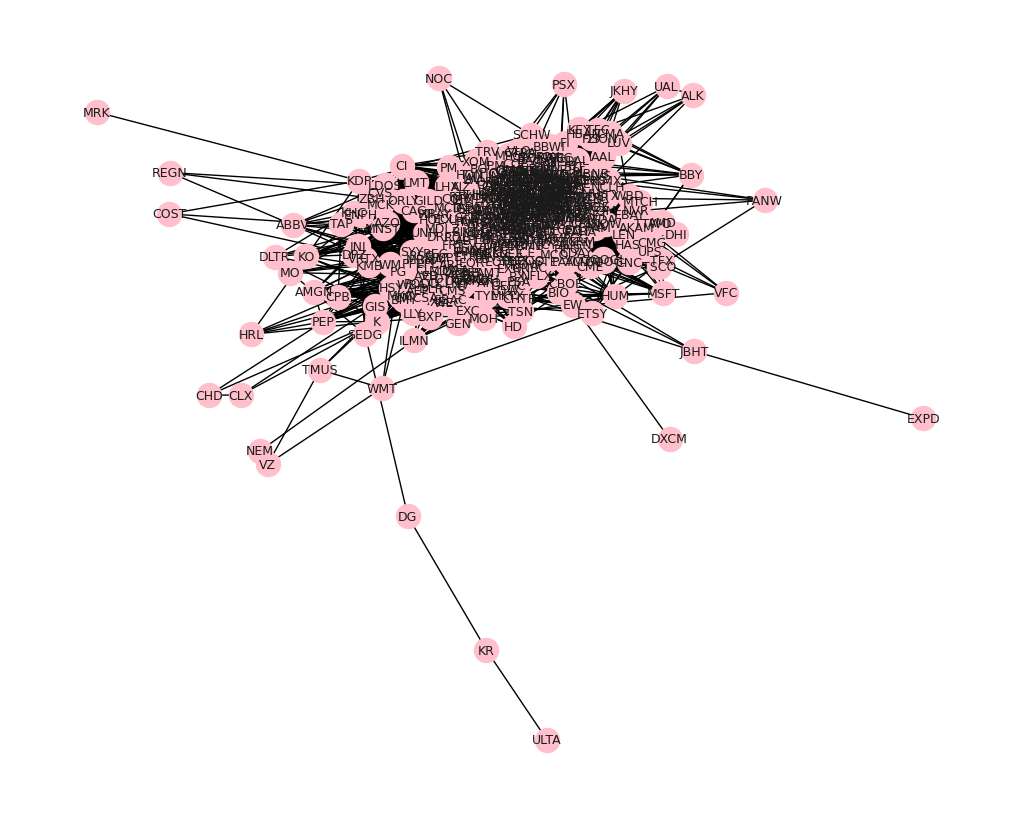

In [ ]:
nx.draw(G_vol, with_labels=True, node_color='pink', node_size=300, edge_color='black', linewidths=1, font_size=9)

# Creating an Interactive graph for Volume

In [ ]:
pos = nx.spring_layout(G_vol)
nx.set_node_attributes(G_vol, pos, 'pos')

In [ ]:
node_x = []
node_y = []
edge_x = []
edge_y = []



for edge in G_vol.edges():
    x0, y0 = G_vol.nodes[edge[0]]['pos']
    x1, y1 = G_vol.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

for node in G_vol.nodes():
    x, y = G_vol.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    hoverinfo='text',
    text=list(G_vol.nodes()),
    hovertext = node_text,
    textposition='top right',
    #textfont=dict(color='#E58606'),
    mode='lines+markers+text', #+text
    marker=dict(
        showscale=True,
        colorscale='Rainbow',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ), line_width =2 ))


In [ ]:
node_trace.marker.color = node_adjacencies
volume_corr['SPY']

A       0.604670
AAL     0.820217
AAPL    0.374524
ABBV    0.225962
ABNB    0.509960
          ...   
YUM     0.700922
ZBH     0.395076
ZBRA    0.403540
ZION    0.727164
ZTS     0.674179
Name: SPY, Length: 501, dtype: float64

In [ ]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Correlation Graph of S&P Companies Based on Volume',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()